# Working on TCS Data Stock Price Predictions 

![Nvidia](tcs.gif)

## Steps to build this project

- 1 First load essential Moduels 
- 2 Load Dataset 
- 3 Check information about dataset 
- 4 Make date as index 
- 5 plotting close data with date 
- 6 Split data into Train-Test 
- 7 Create different regression model and check R2 score 
- 8 Select those model who gave good R2 score 
- 9 From those Model create a ensemble model for this we use voting regression model 
- 10 Check R2 score of that ensemble model 
- 11 Save it on Pickle and Joblib File 
- 12 Testing Saved model on random data 

In [2]:
#import essential modules 

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#loading essential modules for dataset 

tcs = pd.read_csv("new dataset/Preprocessed_TCS_Dataset.csv")
tcs.info()

tcs['date'] = pd.to_datetime(tcs['date'])
tcs.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2758 non-null   object 
 1   open    2758 non-null   float64
 2   high    2758 non-null   float64
 3   low     2758 non-null   float64
 4   close   2758 non-null   float64
 5   volume  2758 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 129.4+ KB


In [5]:
tcs.sample(6)

,open,high,low,close,volume
date,,,,,
2018-07-30,101.25,103.500,98.415,99.30,10754
2022-10-07,79.05,80.475,78.300,80.25,29178
2021-03-05,237.60,238.350,208.500,227.85,124347
2022-06-06,116.70,116.700,112.500,115.50,29855
2015-08-24,233.25,240.000,221.700,237.15,24166
2015-09-30,215.55,216.300,201.150,211.20,28031


# Plotting Close Data

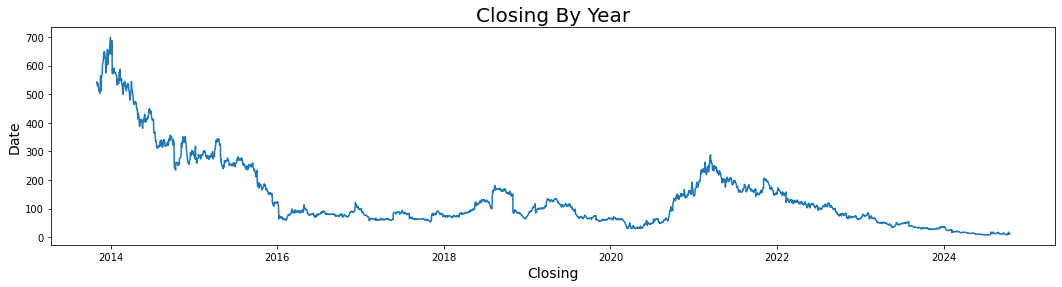

In [6]:
plt.figure(figsize=(18,4))

plt.title("Closing By Year",fontsize=20)

plt.xlabel('Closing',fontsize = 14)

plt.ylabel('Date',fontsize = 14)

plt.plot(tcs['close'])

plt.show()

# Plotting Volume Data

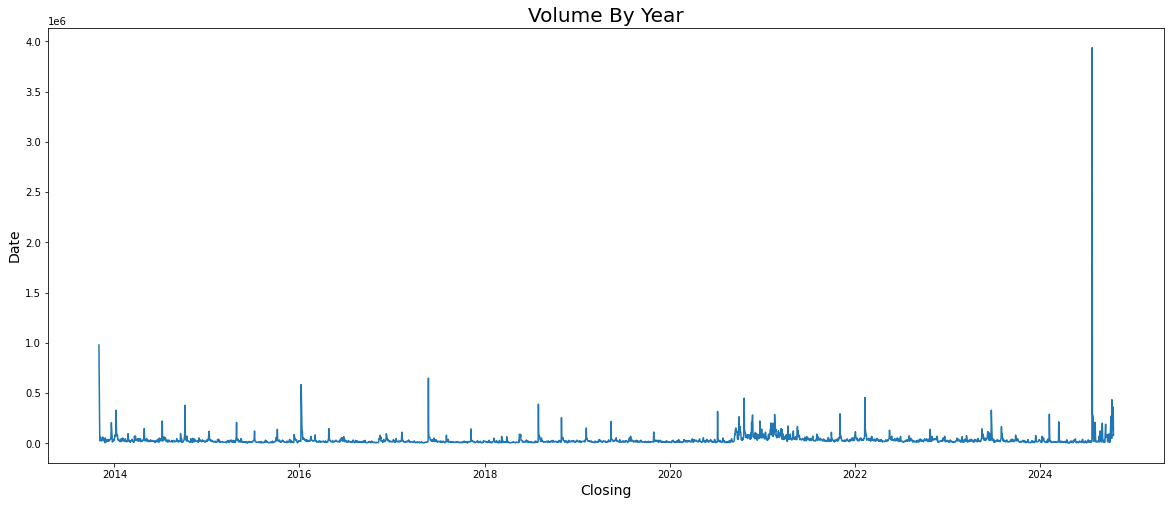

In [7]:
plt.figure(figsize=(20,8))
plt.title("Volume By Year",fontsize=20)
plt.xlabel('Closing',fontsize = 14)
plt.ylabel('Date',fontsize = 14)
plt.plot(tcs['volume'])
plt.show()

# Train-Test Split data

In [8]:
from sklearn.model_selection import train_test_split
features = ['open','high','low','volume']
x = tcs[features]
y = tcs['close']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,shuffle=False)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(2206, 4)
(552, 4)
(2206,)
(552,)


# Machine Learning (Regression) on TCS Data

## 1) Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
modellr = LinearRegression()
modellr.fit(xtrain,ytrain)
ypred = modellr.predict(xtest)
from sklearn.metrics import r2_score
r2_0 = r2_score(ytest,ypred)
print(f"R2 Score of Linear Regression : {r2_0}")

R2 Score of Linear Regression : 0.9979612118835919


## plotting regression model

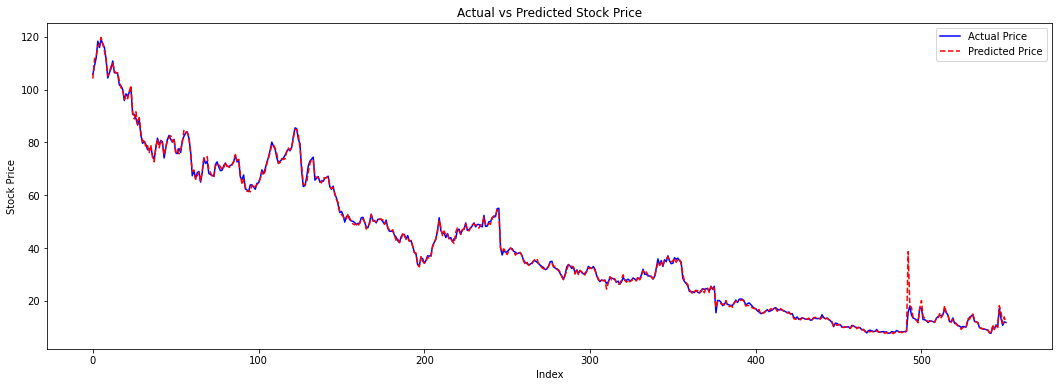

In [10]:
y_pred = np.squeeze(np.array(ypred))
y_test = np.array(ytest)
plt.figure(figsize=(18,6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Price', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Price', color='red', linestyle='--')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.show()

## 2) Ridge Regression

In [11]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(xtrain, ytrain)
ypred1 = ridge_reg.predict(xtest)

r2_1 = r2_score(ytest,ypred1)
print(f"R2 Score of Ridge Regression (L2 regularization) = {r2_1}")

R2 Score of Ridge Regression (L2 regularization) = 0.9979612934362246


## 3) Lasso Regression

In [12]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(xtrain, ytrain)
ypred2 = lasso_reg.predict(xtest)
r2_2 = r2_score(ytest,ypred2)
print(f"R2 Score of Lasso Regression (L1 regularization) = {r2_2}")

R2 Score of Lasso Regression (L1 regularization) = 0.9890586523727406


## 4) Elastic NET Regression

In [13]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(xtrain, ytrain)
ypred3 = elastic_net.predict(xtest)
r2_3 = r2_score(ytest,ypred3)
print(f"R2 Score of Elastic Net Regression = {r2_3}")

R2 Score of Elastic Net Regression = 0.9891227853737217


## 5) KNN Regression

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(xtrain,ytrain)
ypred9 = knn_reg.predict(xtest)
r2_9 = r2_score(ytest,ypred9)
print(f"R2 Score of KNN Regression = {r2_9}")

R2 Score of KNN Regression = -5.895336752453752


## In Conclusion 

### We get 4 different types of regression they are :-


| Regression Model         | R2 Score         |
|--------------------------|------------------|
|1) Linear Regression      |0.9979612118835919|
|2) Ridge Regression       |0.9979612934362246|
|3) Lasso Regression       |0.9890586523727406|
|4) Elastic Net Regression |0.9891227853737217|

# Voting Ensemble Model

In [15]:
#import ml model 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import r2_score
#making machine 
modellr = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

#loading voting regressor modules 
from sklearn.ensemble import VotingRegressor

#creating voting ensemble model 
votingmodel = VotingRegressor([
    ('lr',modellr),
    ('rr',ridge_reg),
    ('lar',lasso_reg),
    ('enr',elastic_net)
])

#train voting model 
votingmodel.fit(xtrain,ytrain)

yprediction = votingmodel.predict(xtest)
R2_score = r2_score(ytest,yprediction)
print(f"R2 Score of a voting model :{R2_score}")

R2 Score of a voting model :0.9982187803121194


# Plotting Voting Regression 

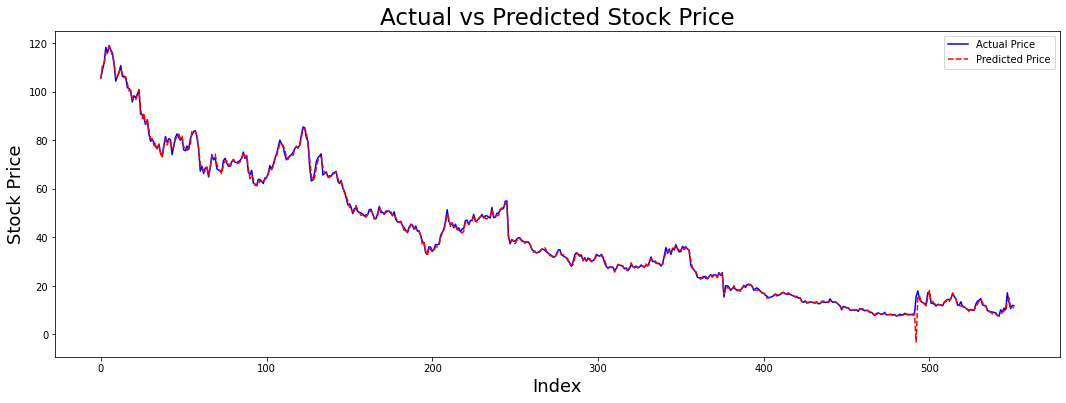

In [16]:
# Assuming y_test is a pandas Series, y_pred is a numpy array or multi-dimensional structure
import matplotlib.pyplot as plt
# Convert y_pred to a 1D numpy array (if it's not already)
y_pred = np.squeeze(np.array(yprediction))  # Flatten if it's multi-dimensional

# Ensure y_test is aligned (if y_test is a pandas Series)
y_test = np.array(ytest)  # You can convert it to a numpy array if needed
plt.figure(figsize=(18,6))
# Plot the actual vs predicted values
plt.plot(np.arange(len(ytest)), ytest, label='Actual Price', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Price', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Index',fontsize=18)
plt.ylabel('Stock Price',fontsize=18)
plt.title('Actual vs Predicted Stock Price',fontsize=23)
plt.legend()

# Display the plot
plt.show()

# Save Model with Pickle

In [17]:
import pickle
# Specify the filename
filename = "Models/TCS_ensemble_model.pkl"

# Open the file in write-binary mode and save the model
with open(filename, 'wb') as file:
    pickle.dump(votingmodel, file)
    
# Load the model
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# You can now use loaded_model to make predictions
predictions = loaded_model.predict(xtest)

print(predictions)

#r2 score 
r2scoree = r2_score(ytest,predictions)
print(f"R2 Score of pickle ensemble model : {r2scoree}")

[105.3625466  111.11840345 111.61090119 115.88956173 116.9188859
 119.11233659 117.13615333 114.72961228 112.20243826 105.90059801
 106.1714313  108.28101801 109.49603291 107.49364708 105.77127319
 106.17079142 103.53113383 100.40599041 100.66248611  97.01856415
  97.16320038  96.55434955  98.66983085 100.98724544  92.67157045
  89.06272016  91.2632704   86.69123338  88.72844474  84.25796558
  80.78192886  80.66108519  77.97830142  78.76766521  76.45662878
  78.56706736  74.72518178  72.75461807  77.79481547  80.49169668
  78.11024822  80.23467166  79.10842996  76.37585794  77.32014018
  80.43604726  81.48873531  82.52297267  80.80341206  81.68592645
  76.95189565  77.24331377  75.88456305  76.79776159  78.50310132
  84.21078038  83.82021441  83.47095083  82.20961947  76.60417018
  70.06451721  69.22838328  67.34179145  67.12175118  68.74525944
  65.7586859   69.05258892  73.59035726  73.70703535  74.31013359
  70.02633492  68.13526087  67.27146517  66.22715333  70.2742479
  71.5526875

# Save Model With Joblib

In [18]:
import joblib

# Save the model to a file
joblib.dump(votingmodel, 'Models/TCS_ensemble_model.joblib')
# Load the model from the file
loaded_model = joblib.load('Models/TCS_ensemble_model.joblib')

# Now you can use loaded_model to make predictions
predictions = loaded_model.predict(xtest)
print(predictions)
r2scoree = r2_score(ytest,predictions)
print(f"R2 Score of pickle ensemble model : {r2scoree}")

[105.3625466  111.11840345 111.61090119 115.88956173 116.9188859
 119.11233659 117.13615333 114.72961228 112.20243826 105.90059801
 106.1714313  108.28101801 109.49603291 107.49364708 105.77127319
 106.17079142 103.53113383 100.40599041 100.66248611  97.01856415
  97.16320038  96.55434955  98.66983085 100.98724544  92.67157045
  89.06272016  91.2632704   86.69123338  88.72844474  84.25796558
  80.78192886  80.66108519  77.97830142  78.76766521  76.45662878
  78.56706736  74.72518178  72.75461807  77.79481547  80.49169668
  78.11024822  80.23467166  79.10842996  76.37585794  77.32014018
  80.43604726  81.48873531  82.52297267  80.80341206  81.68592645
  76.95189565  77.24331377  75.88456305  76.79776159  78.50310132
  84.21078038  83.82021441  83.47095083  82.20961947  76.60417018
  70.06451721  69.22838328  67.34179145  67.12175118  68.74525944
  65.7586859   69.05258892  73.59035726  73.70703535  74.31013359
  70.02633492  68.13526087  67.27146517  66.22715333  70.2742479
  71.5526875

# Testing on Sample Data

In [19]:
tcs.sample(6)

,open,high,low,close,volume
date,,,,,
2020-06-26,44.10,48.000,42.45,47.10,38651
2022-04-08,117.30,120.825,116.55,117.15,17874
2019-11-20,56.10,56.400,54.30,55.95,17957
2018-12-07,77.85,81.900,75.30,76.65,17740
2023-01-23,73.35,75.000,72.60,73.50,17379
2021-10-19,151.95,156.300,151.95,153.00,32907


## With Pickle File

In [20]:
import pickle 
filename = "Models/TCS_ensemble_model.pkl"
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)
    
sample = np.array([44.10, 48.000, 42.45, 38651])
sample_reshaped = pd.DataFrame([sample], columns=['open','high','low','volume'])
prediction = loaded_model.predict(sample_reshaped)
print(prediction[0])

45.62188804455464


## with Joblib file

In [21]:
import joblib

amzn_model = joblib.load("Models/TCS_ensemble_model.joblib")
prediction2 = amzn_model.predict(sample_reshaped)
print(prediction2[0])

45.62188804455464


## Closing Statement

In this project, we delved into the realm of stock price prediction, focusing on Amazon's stock data. By leveraging the power of ensemble learning, specifically a voting ensemble model, we aimed to construct a robust and accurate predictive model. 

Through meticulous data preprocessing, feature engineering, and model training, we achieved promising results. The voting ensemble model, composed of multiple diverse base models, demonstrated superior performance in predicting future stock closing prices.

We believe that this work contributes to the ongoing research in stock market prediction and offers valuable insights for investors and financial analysts. 

**Footnote:**

*This project was completed by **Geetanshu Dev Meshram** on [4 November 2024].*